# Netlfix Userbase Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Netflix Userbase.csv")

In [4]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [15]:
x=df.shape
print(f"Dataset has {x[0]} rows and {x[1]} columns")

Dataset has 2500 rows and 10 columns


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [17]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [19]:
df.describe(include="object").T

,count,unique,top,freq
Subscription Type,2500,3,Basic,999
Join Date,2500,300,05-11-22,33
Last Payment Date,2500,26,28-06-23,164
Country,2500,10,United States,451
Gender,2500,2,Female,1257
Device,2500,4,Laptop,636
Plan Duration,2500,1,1 Month,2500


In [12]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [21]:
df['Join Date']=pd.to_datetime(df['Join Date'],format='mixed')
df['Last Payment Date']=pd.to_datetime(df['Last Payment Date'],format='mixed')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [23]:
def showlabels(ax):
    for data in ax.containers: ax.bar_label(data)

## Data Analysis

In [27]:
total_user_id=df['User ID'].count()
print(f"Total user id is: {total_user_id}")

Total user id is: 2500


In [50]:
subscription=df.groupby(["Subscription Type"])["User ID"].count()
print(subscription)

Subscription Type
Basic       999
Premium     733
Standard    768
Name: User ID, dtype: int64


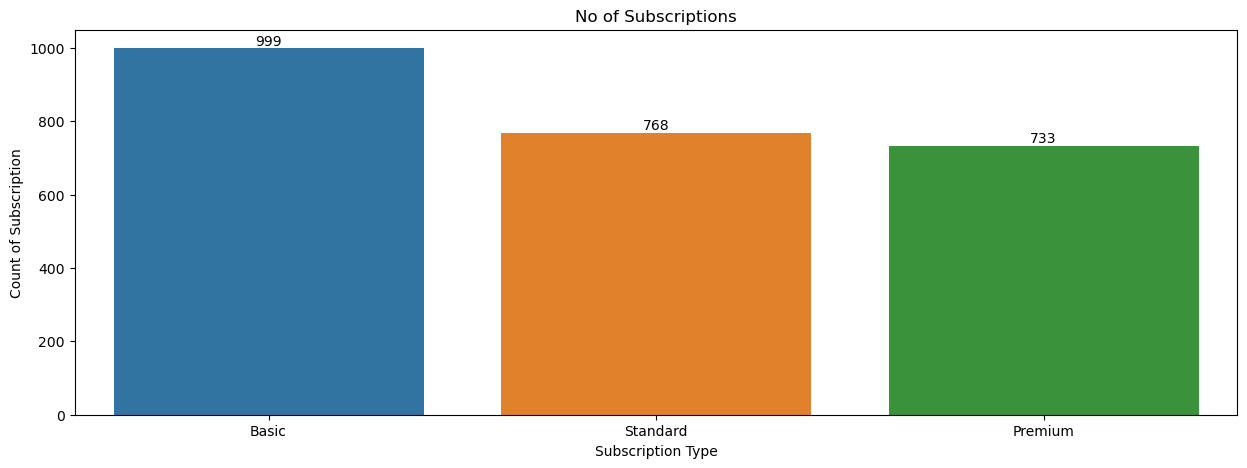

In [51]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x="Subscription Type",y="User ID",data=x)

plt.title("No of Subscriptions")
plt.xlabel("Subscription Type")
plt.ylabel("Count of Subscription")
showlabels(ax)


In [71]:
date=df.groupby(df["Join Date"].dt.year)["User ID"].count().reset_index()
print(date)

   Join Date  User ID
0       2021       14
1       2022     2448
2       2023       38


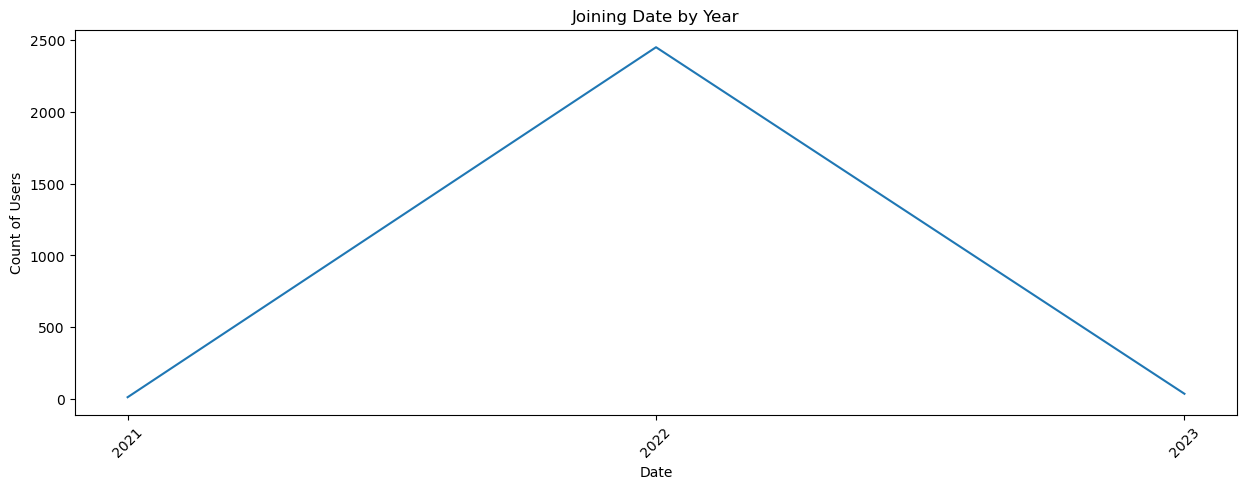

In [72]:
plt.figure(figsize=(15,5))
plt.plot(date["Join Date"].astype(str),date["User ID"])

plt.title("Joining Date by Year")
plt.xlabel("Date")
plt.ylabel("Count of Users")
plt.xticks(rotation=45)
showlabels(ax)

In [63]:
date_month=df.groupby(df["Join Date"].dt.to_period("M"))["User ID"].count().reset_index()
print(date_month)

   Join Date  User ID
0    2021-05        3
1    2021-08        1
2    2021-09        4
3    2021-10        2
4    2021-11        2
5    2021-12        2
6    2022-01       81
7    2022-02       87
8    2022-03       97
9    2022-04      106
10   2022-05      129
11   2022-06      336
12   2022-07      393
13   2022-08      291
14   2022-09      301
15   2022-10      415
16   2022-11      117
17   2022-12       95
18   2023-01        7
19   2023-02        5
20   2023-03        6
21   2023-04        2
22   2023-05        3
23   2023-06        2
24   2023-07        3
25   2023-08        4
26   2023-09        1
27   2023-10        1
28   2023-11        3
29   2023-12        1


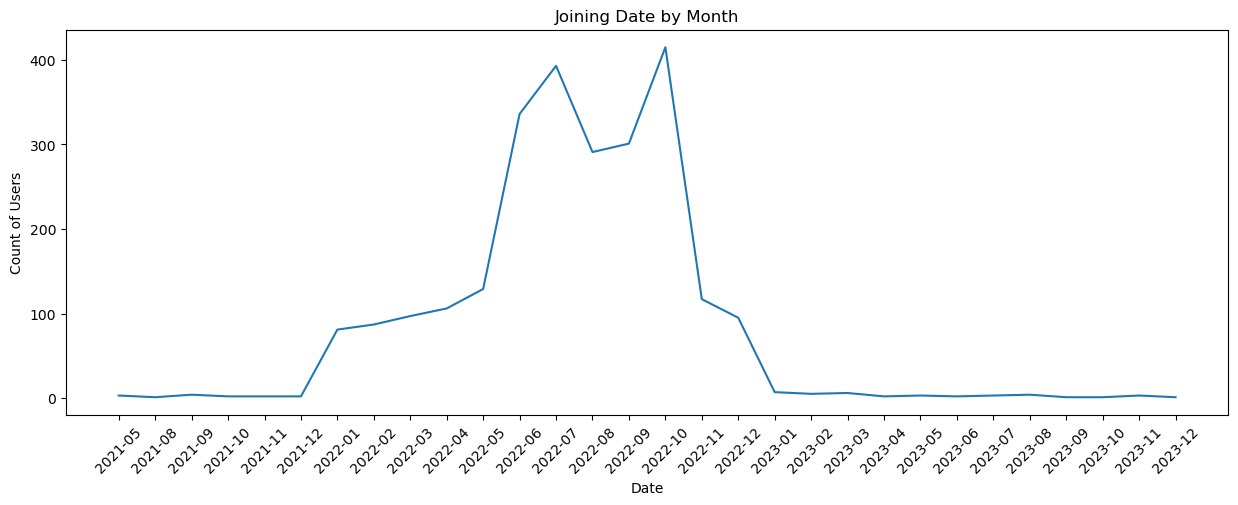

In [69]:
plt.figure(figsize=(15,5))
plt.plot(date_month["Join Date"].astype(str),date_month["User ID"])

plt.title("Joining Date by Month")
plt.xlabel("Date")
plt.ylabel("Count of Users")
plt.xticks(rotation=45)
showlabels(ax)

In [75]:
date_quarter=df.groupby(df["Join Date"].dt.to_period("Q"))["User ID"].count().reset_index()
print(date_quarter)

   Join Date  User ID
0     2021Q2        3
1     2021Q3        5
2     2021Q4        6
3     2022Q1      265
4     2022Q2      571
5     2022Q3      985
6     2022Q4      627
7     2023Q1       18
8     2023Q2        7
9     2023Q3        8
10    2023Q4        5


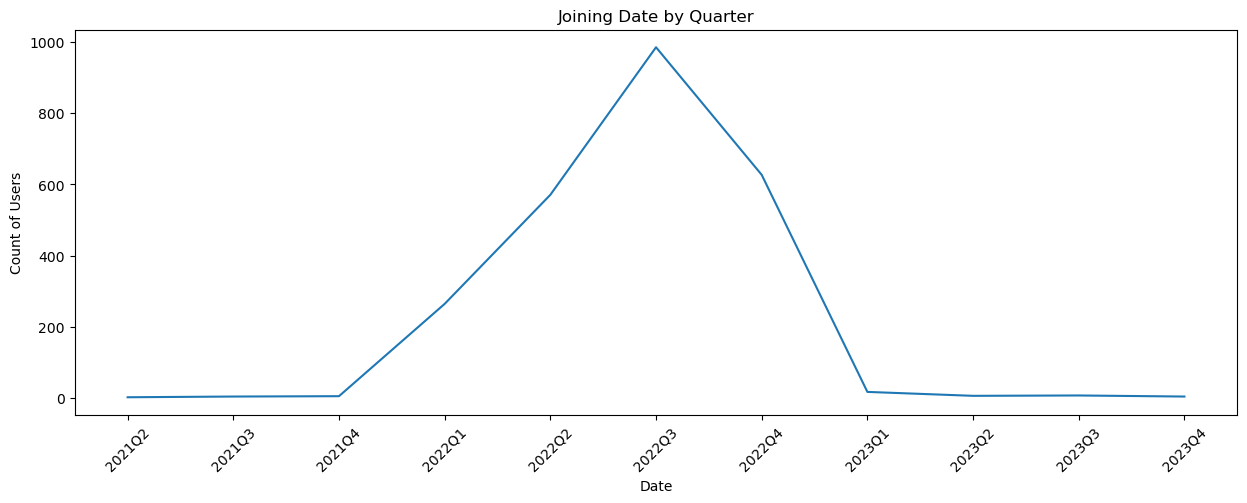

In [77]:
plt.figure(figsize=(15,5))
plt.plot(date_quarter["Join Date"].astype(str),date_quarter["User ID"])

plt.title("Joining Date by Quarter")
plt.xlabel("Date")
plt.ylabel("Count of Users")
plt.xticks(rotation=45)
showlabels(ax)

In [86]:
country=df.groupby(df["Country"])["User ID"].count()
sort=country.sort_values(ascending=False).reset_index()
print(sort)

          Country  User ID
0           Spain      451
1   United States      451
2          Canada      317
3       Australia      183
4          Brazil      183
5          France      183
6         Germany      183
7           Italy      183
8          Mexico      183
9  United Kingdom      183


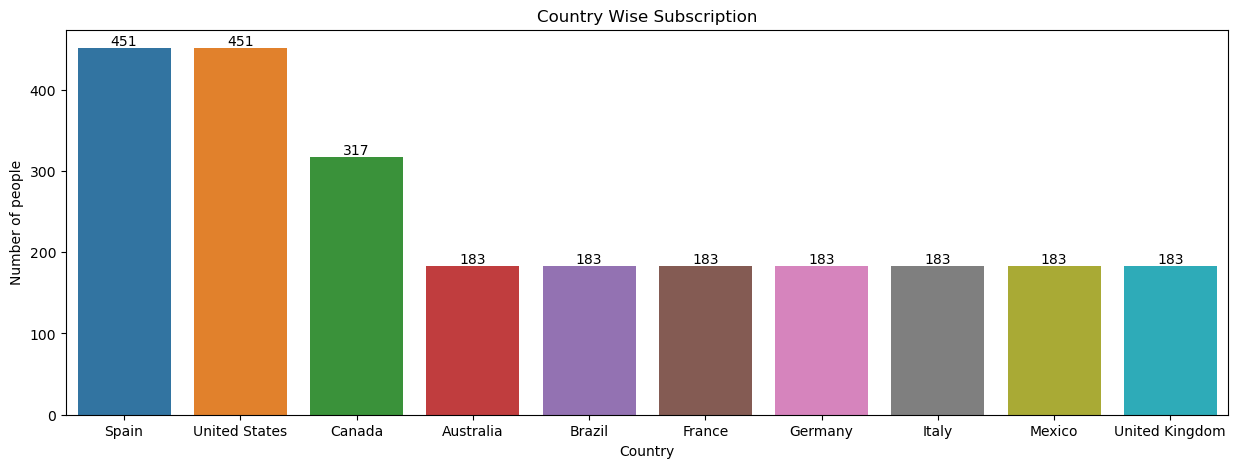

In [95]:
plt.figure(figsize=(15,5))
ax=sns.barplot(x="Country",y="User ID",data=sort)
plt.title("Country Wise Subscription")
plt.xlabel("Country")
plt.ylabel("Number of people")
showlabels(ax)

Text(0, 0.5, 'Frequency')

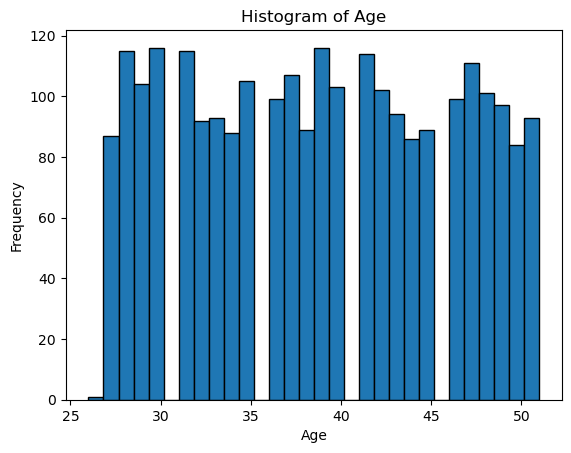

In [97]:
plt.hist(df["Age"], bins=30,edgecolor="Black")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [98]:
gender=df.groupby(df["Gender"])["User ID"].count().reset_index()
print(gender)

   Gender  User ID
0  Female     1257
1    Male     1243


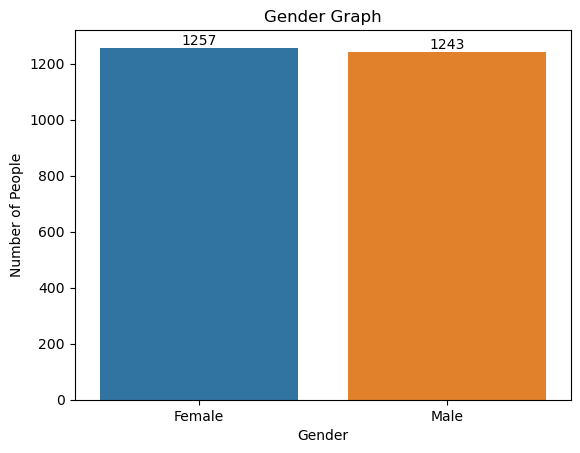

In [101]:
ax=sns.barplot(x="Gender",y="User ID", data=gender)
plt.title("Gender Graph")
plt.xlabel("Gender")
plt.ylabel("Number of People")
showlabels(ax)

In [106]:
device=df.groupby(df["Device"])["User ID"].count()
sort=device.sort_values(ascending=False).reset_index()
print(sort)

       Device  User ID
0      Laptop      636
1      Tablet      633
2  Smartphone      621
3    Smart TV      610


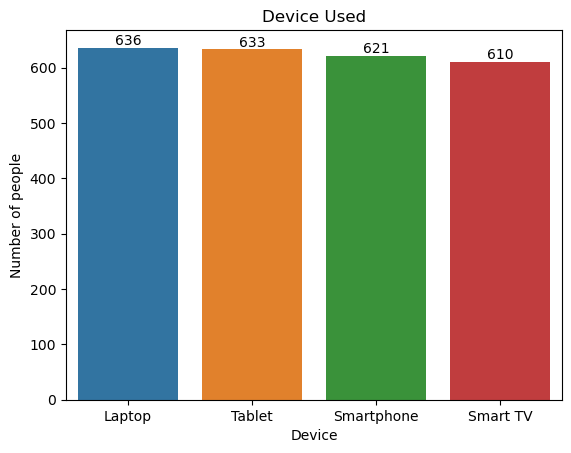

In [109]:
ax=sns.barplot(x="Device",y="User ID",data=sort)
plt.title("Device Used")
plt.xlabel ("Device")
plt.ylabel("Number of people")
showlabels(ax)